In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/home/labs/amit/noamsh/repos/sc_clustering')

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix

from pathlib import Path

In [3]:
import config
from clustering import scanpy_cluster
from create_baseline_clusters import load_data_and_save_to_results_dir

## Load data

In [4]:
adata, experiment_results_dir_path = load_data_and_save_to_results_dir() 

loading relevant batches:   0%|          | 0/137 [00:00<?, ?batch/s]

merging to single adata
converting adata to sparse matrix


... storing 'arm.day.batch-mouse' as categorical
... storing 'Mouse/Tumor type' as categorical
... storing 'Sorting date' as categorical
... storing 'Gate' as categorical
... storing 'Notes' as categorical
... storing 'Index beginning time' as categorical
... storing 'Index file' as categorical
... storing 'Sorting Notes' as categorical
... storing 'Experimental Batch' as categorical
... storing 'Batch.Set.ID' as categorical
... storing 'Seq.Batch.ID' as categorical
... storing 'Amp.Batch.ID' as categorical
... storing 'Biological replicate' as categorical
... storing 'Staining panel name' as categorical
... storing 'Institute' as categorical
... storing 'Libraries date' as categorical
... storing 'Cell % per plate' as categorical


dropping Mouse columns, some bug with that column


In [5]:
adata = ad.read(Path(experiment_results_dir_path, "loaded_data.h5ad"))

# pre-procces 

like -- scanpy_cluster.pre_procces_adata(adata)

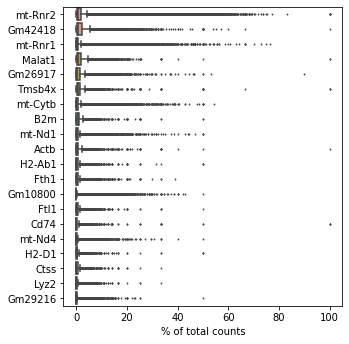

In [6]:
sc.pl.highest_expr_genes(adata, n_top=20, )

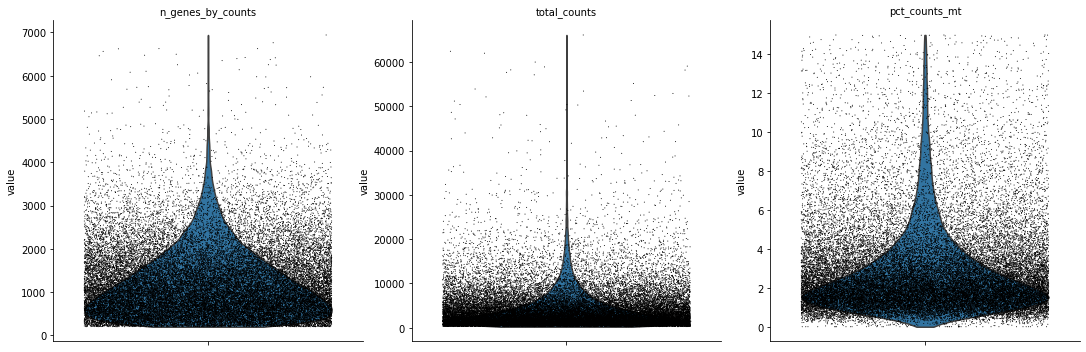

In [8]:
scanpy_cluster.pp_rename_vars_add_mt_metrics(adata)
adata = scanpy_cluster.pp_drop_genes_and_cells(adata)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

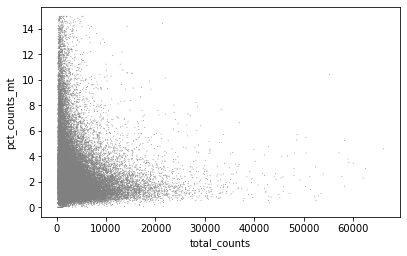

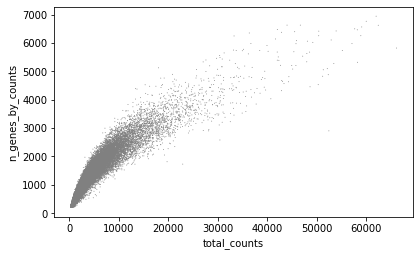

In [9]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

Revieved a view of an AnnData. Making a copy.


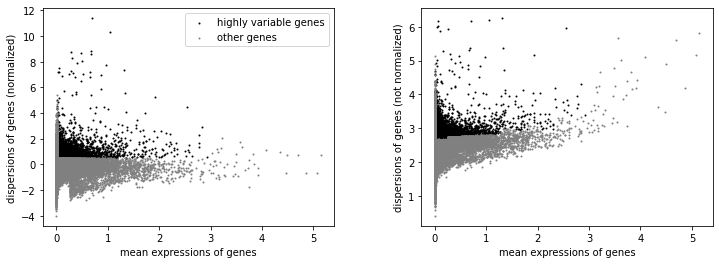

In [10]:
scanpy_cluster.normelize_data(adata)
scanpy_cluster.compute_variable_genes(adata)
sc.pl.highly_variable_genes(adata)

In [11]:
adata = scanpy_cluster.choose_variable_genes(adata)
scanpy_cluster.regress_out_and_scale(adata)

# transform 

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

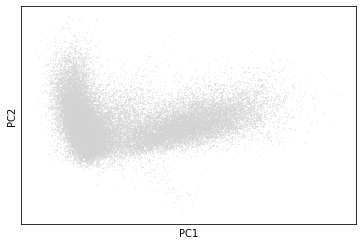

In [13]:
sc.pl.pca(adata) # color=""

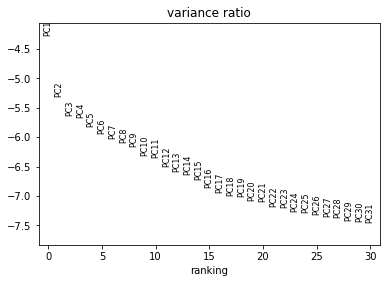

In [14]:
sc.pl.pca_variance_ratio(adata, log=True)

In [62]:
sc.pp.neighbors(adata, n_neighbors=5)

# embedding

In [63]:
sc.tl.umap(adata)

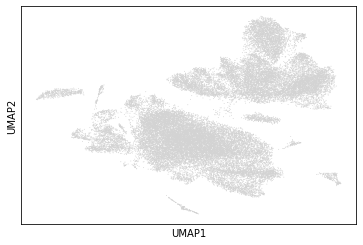

In [64]:
sc.pl.umap(adata) #, color=['CST3', 'NKG7', 'PPBP'])

# cluster

In [65]:
sc.tl.leiden(adata, resolution=1.0)

In [66]:
# adata.var
gene_markers = ['Ctss','Tgfbi', "Tigit", "Cd3d", "Nkg7", "Ccl5"] 

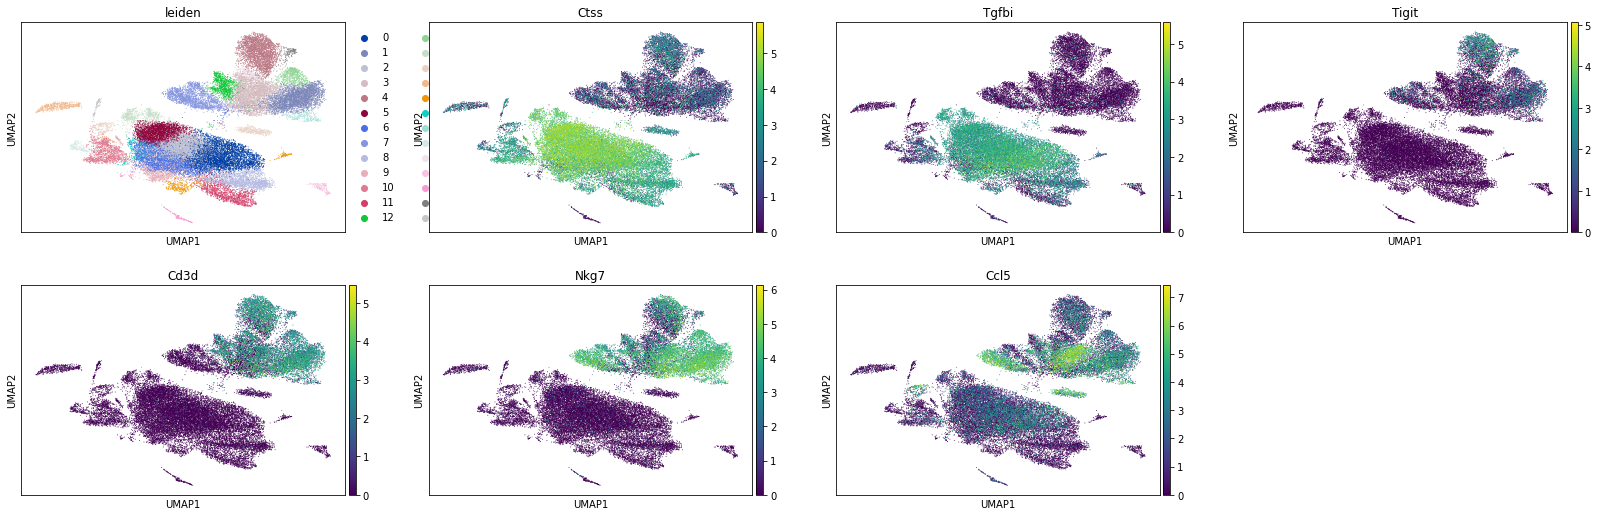

In [67]:
sc.pl.umap(adata, color=['leiden']+ gene_markers)
adata.write(Path(experiment_results_dir_path, "clustered_data.h5ad"))

# marker genes

In [41]:
adata.var.highly_variable

0610009L18Rik    True
0610012G03Rik    True
0610040B10Rik    True
1110002J07Rik    True
1110006O24Rik    True
                 ... 
Zyg11b           True
Zzef1            True
mt-Nd5           True
mt-Tw            True
n-R5s87          True
Name: highly_variable, Length: 4953, dtype: bool

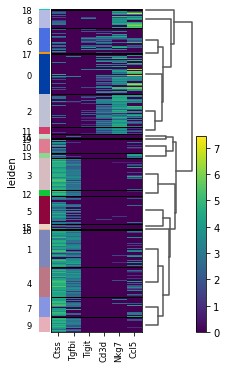

In [59]:
sc.pl.heatmap(adata, gene_markers , groupby='leiden', dendrogram=True)

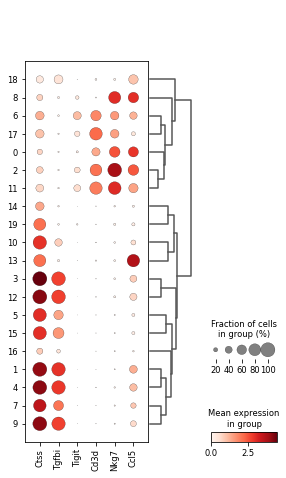

In [61]:
sc.pl.dotplot(adata, gene_markers, groupby='leiden', dendrogram=True)

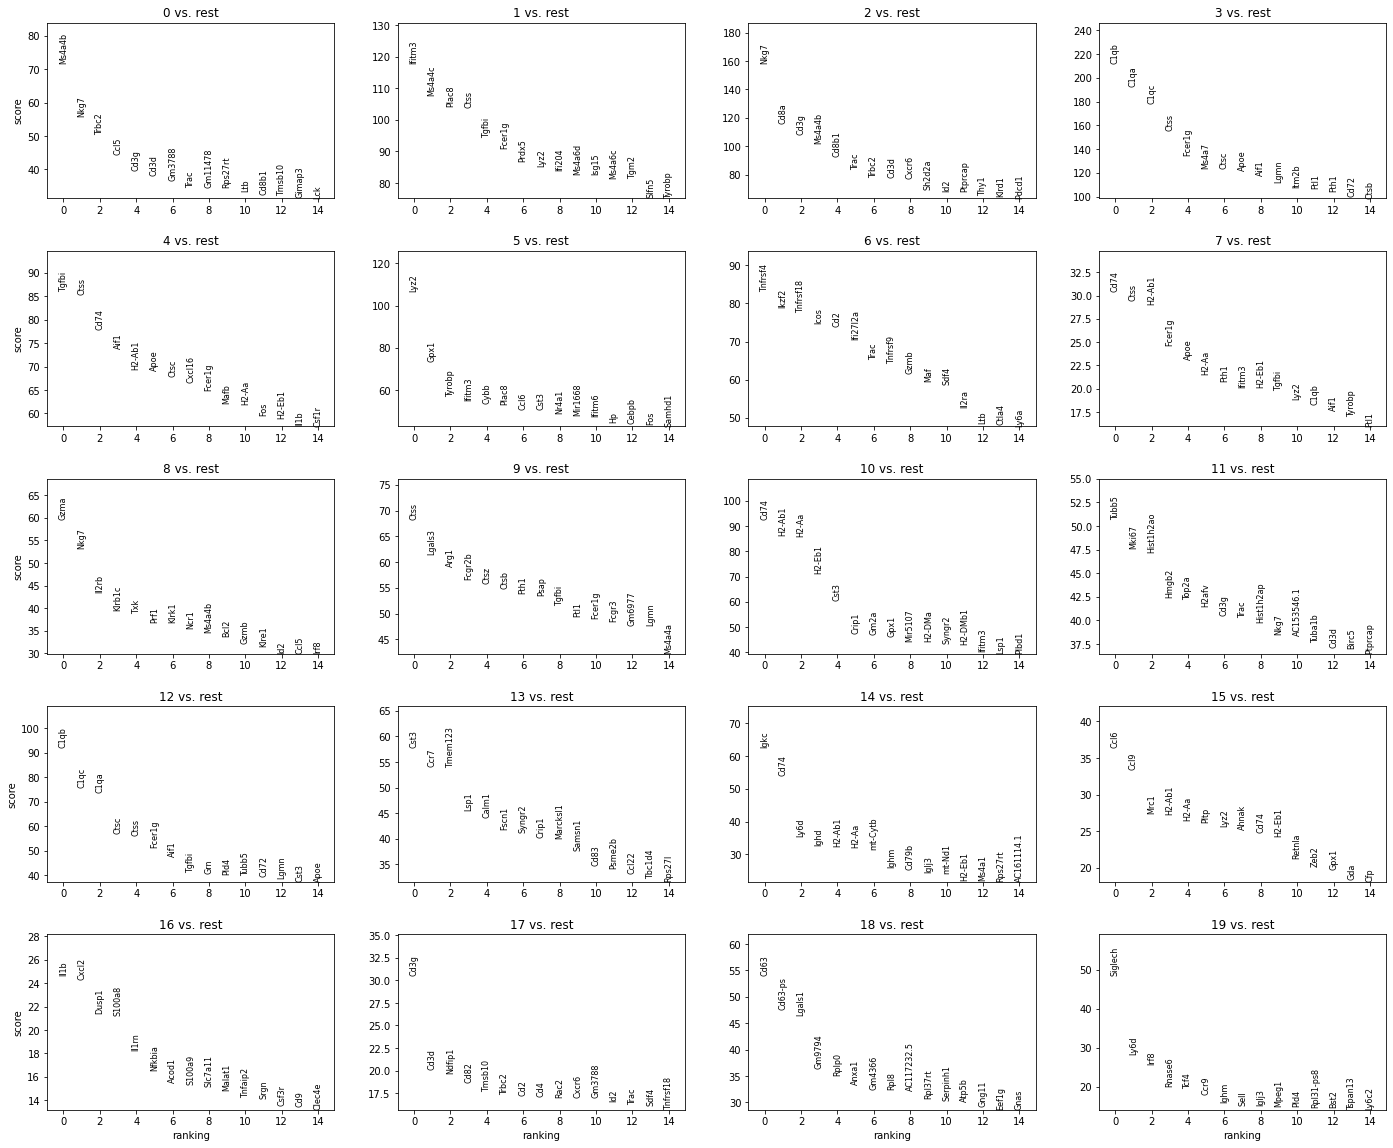

In [28]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


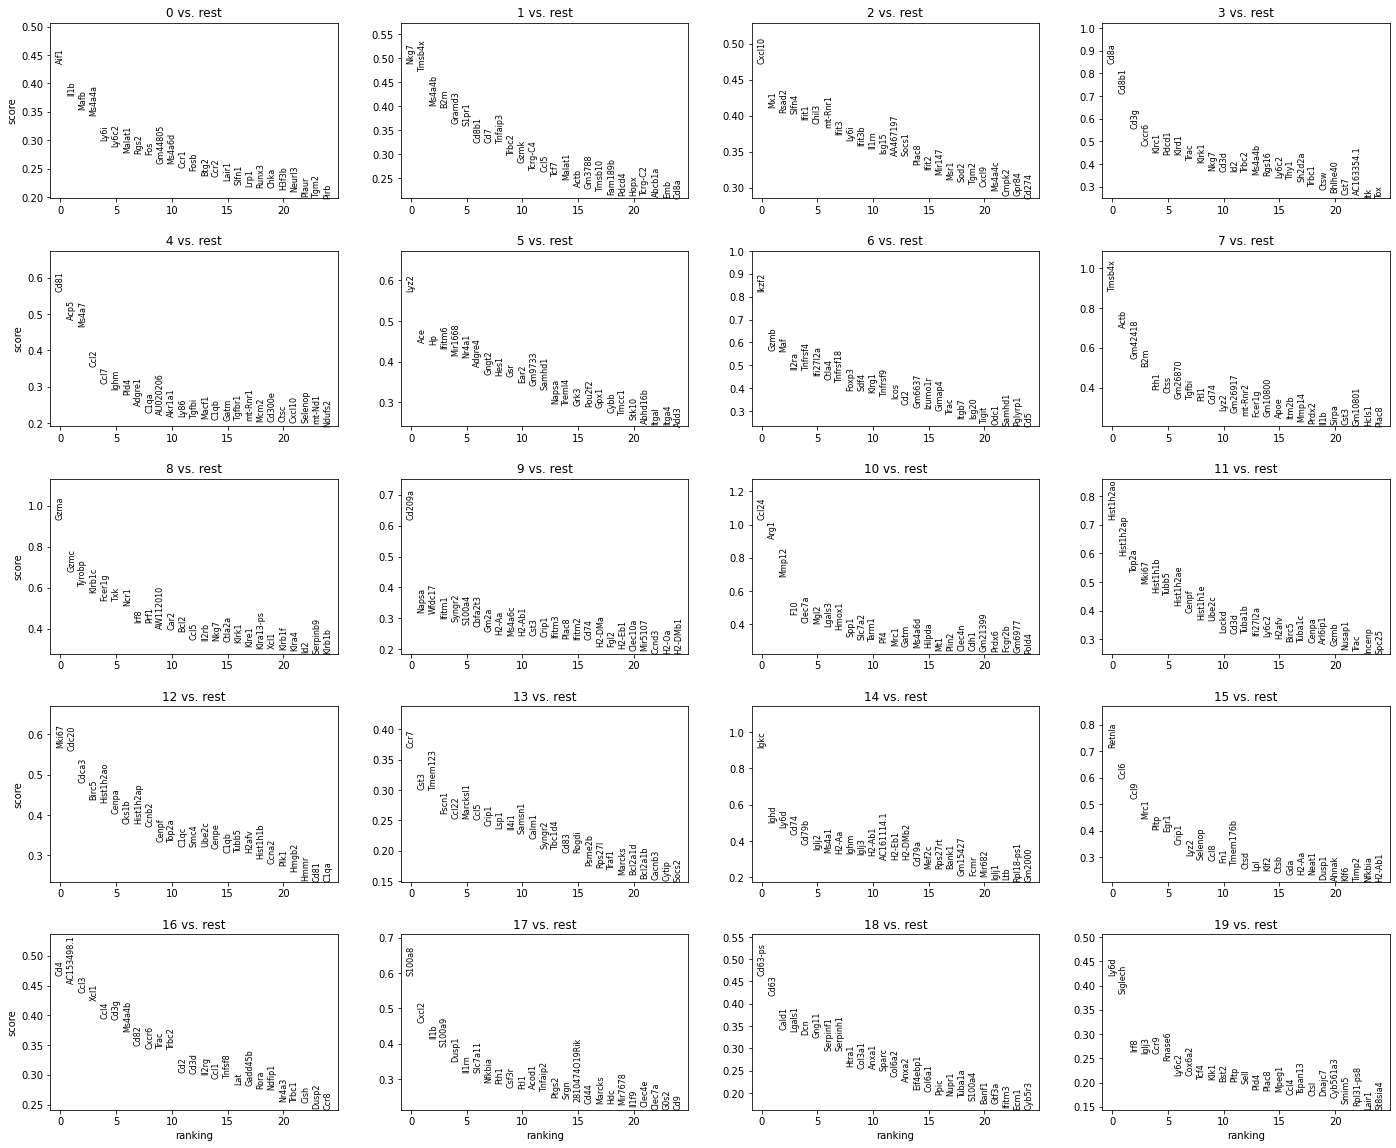

In [30]:
sc.tl.rank_genes_groups(adata, 'leiden', method='logreg')
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False)

In [ ]:
# certain gene
# sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='leiden')

# certain group 
# sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)